In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/routes.csv')
df = df[['Source Airport', 'Destination Airport']]
df

,Source Airport,Destination Airport
0,AER,KZN
1,ASF,KZN
2,ASF,MRV
3,CEK,KZN
4,CEK,OVB
...,...,...
67658,WYA,ADL
67659,DME,FRU
67660,FRU,DME
67661,FRU,OSS


In [6]:
df.value_counts('Source Airport')

,count
Source Airport,
ATL,915
ORD,558
PEK,535
LHR,527
CDG,524
...,...
SSB,1
SRV,1
SRK,1


In [7]:
df.value_counts('Destination Airport')

,count
Destination Airport,
ATL,911
ORD,550
PEK,534
LHR,524
CDG,517
...,...
SRV,1
SSB,1
SSR,1


In [8]:
G = nx.Graph()

In [9]:
for _, row in df.iterrows():
  source = row['Source Airport']
  destination = row['Destination Airport']
  G.add_node(source)
  G.add_node(destination)
  G.add_edge(source, destination)

In [10]:
centrality_degree = nx.degree_centrality(G)
top_k = 10
for x in sorted(centrality_degree, key=centrality_degree.get, reverse=True)[:top_k]:
  print(x, centrality_degree[x])

AMS 0.07242990654205607
FRA 0.07126168224299065
CDG 0.07009345794392523
IST 0.0689252336448598
ATL 0.06337616822429906
PEK 0.06045560747663551
ORD 0.06016355140186915
MUC 0.05607476635514018
DME 0.055490654205607476
DXB 0.054906542056074766


In [11]:
top_airports_degree = sorted(centrality_degree.items(), key=lambda x: x[1], reverse=True)[:25]
top_airports_degree = [airport[0] for airport in top_airports_degree]
top_airports_degree

['AMS',
 'FRA',
 'CDG',
 'IST',
 'ATL',
 'PEK',
 'ORD',
 'MUC',
 'DME',
 'DXB',
 'DFW',
 'LHR',
 'DEN',
 'IAH',
 'LGW',
 'BCN',
 'JFK',
 'FCO',
 'MAD',
 'PVG',
 'BRU',
 'STN',
 'EWR',
 'CAN',
 'LAX']

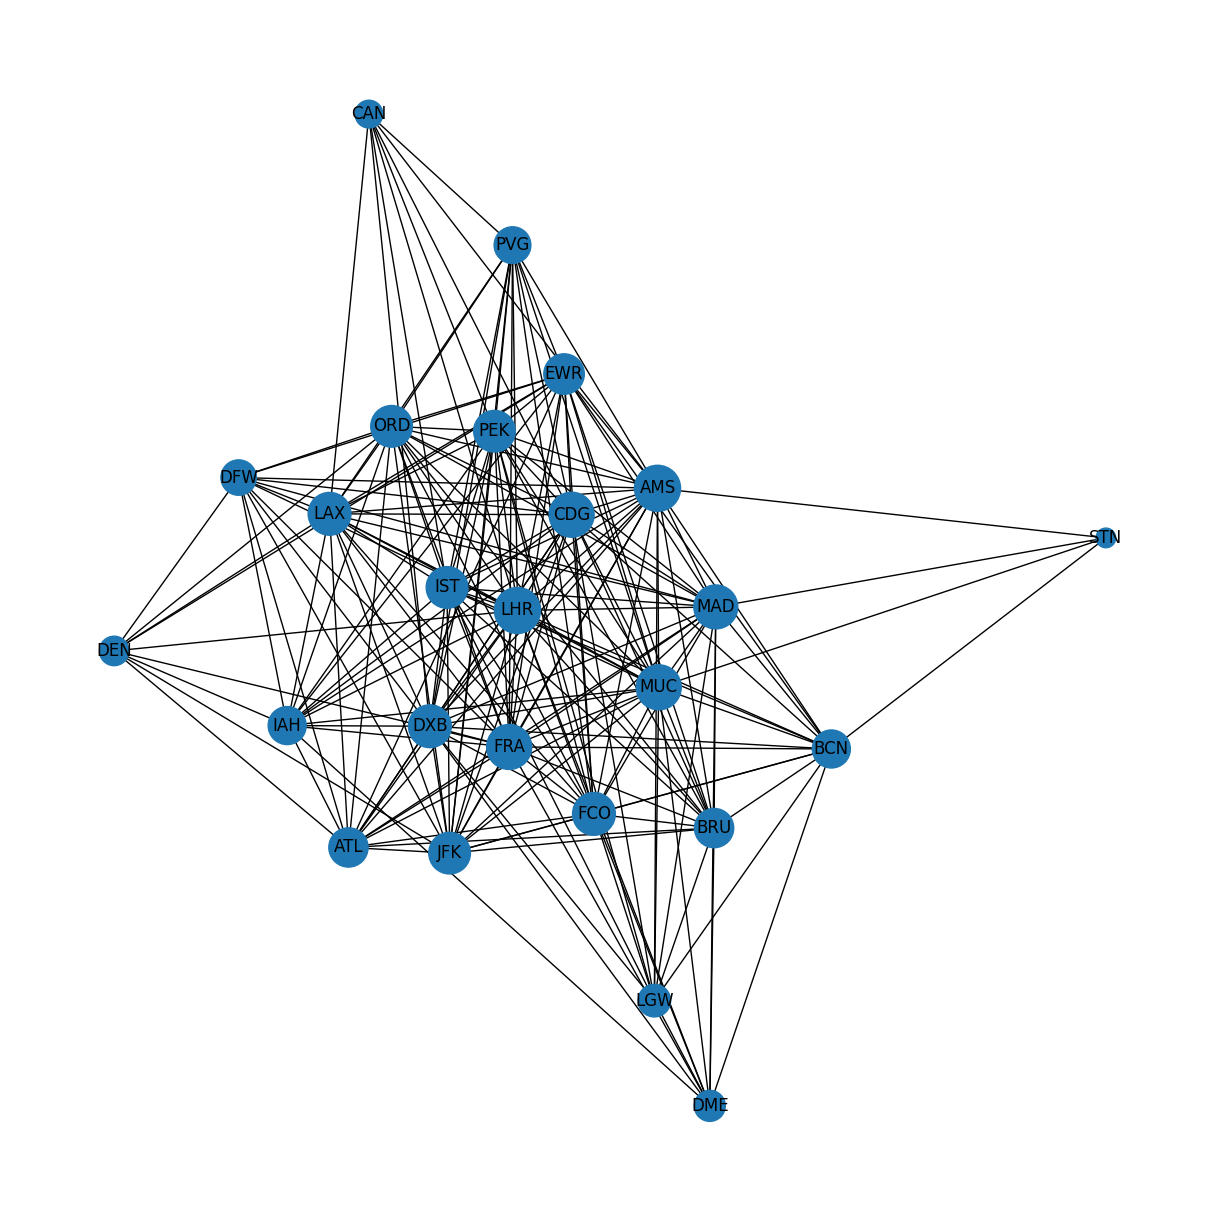

In [12]:
subgraph = G.subgraph(top_airports_degree)
plt.figure(figsize=(12, 12))
node_sizes = [subgraph.degree(node) * 50 for node in subgraph.nodes()]
pos = nx.spring_layout(subgraph, k=0.2)
nx.draw(subgraph, pos, with_labels=True, node_size=node_sizes)
plt.show()

In [13]:
closeness = nx.closeness_centrality(G)
top_k = 10
for x in sorted(closeness, key=closeness.get, reverse=True)[:top_k]:
  print(x, closeness[x])

FRA 0.39855981208881985
CDG 0.39612242408122034
LHR 0.39408318380280993
AMS 0.3898413161993769
DXB 0.38948068593462265
LAX 0.38564563452743494
JFK 0.3835814795538796
YYZ 0.37913428320155523
IST 0.37709683967337854
ORD 0.37650670377404616


In [14]:
top_airports_closeness = sorted(closeness.items(), key=lambda x: x[1], reverse=True)[:25]
top_airports_closeness = [airport[0] for airport in top_airports_closeness]
top_airports_closeness

['FRA',
 'CDG',
 'LHR',
 'AMS',
 'DXB',
 'LAX',
 'JFK',
 'YYZ',
 'IST',
 'ORD',
 'PEK',
 'MUC',
 'FCO',
 'NRT',
 'EWR',
 'DOH',
 'ICN',
 'ZRH',
 'MAD',
 'IAH',
 'HKG',
 'IAD',
 'DFW',
 'ATL',
 'PVG']

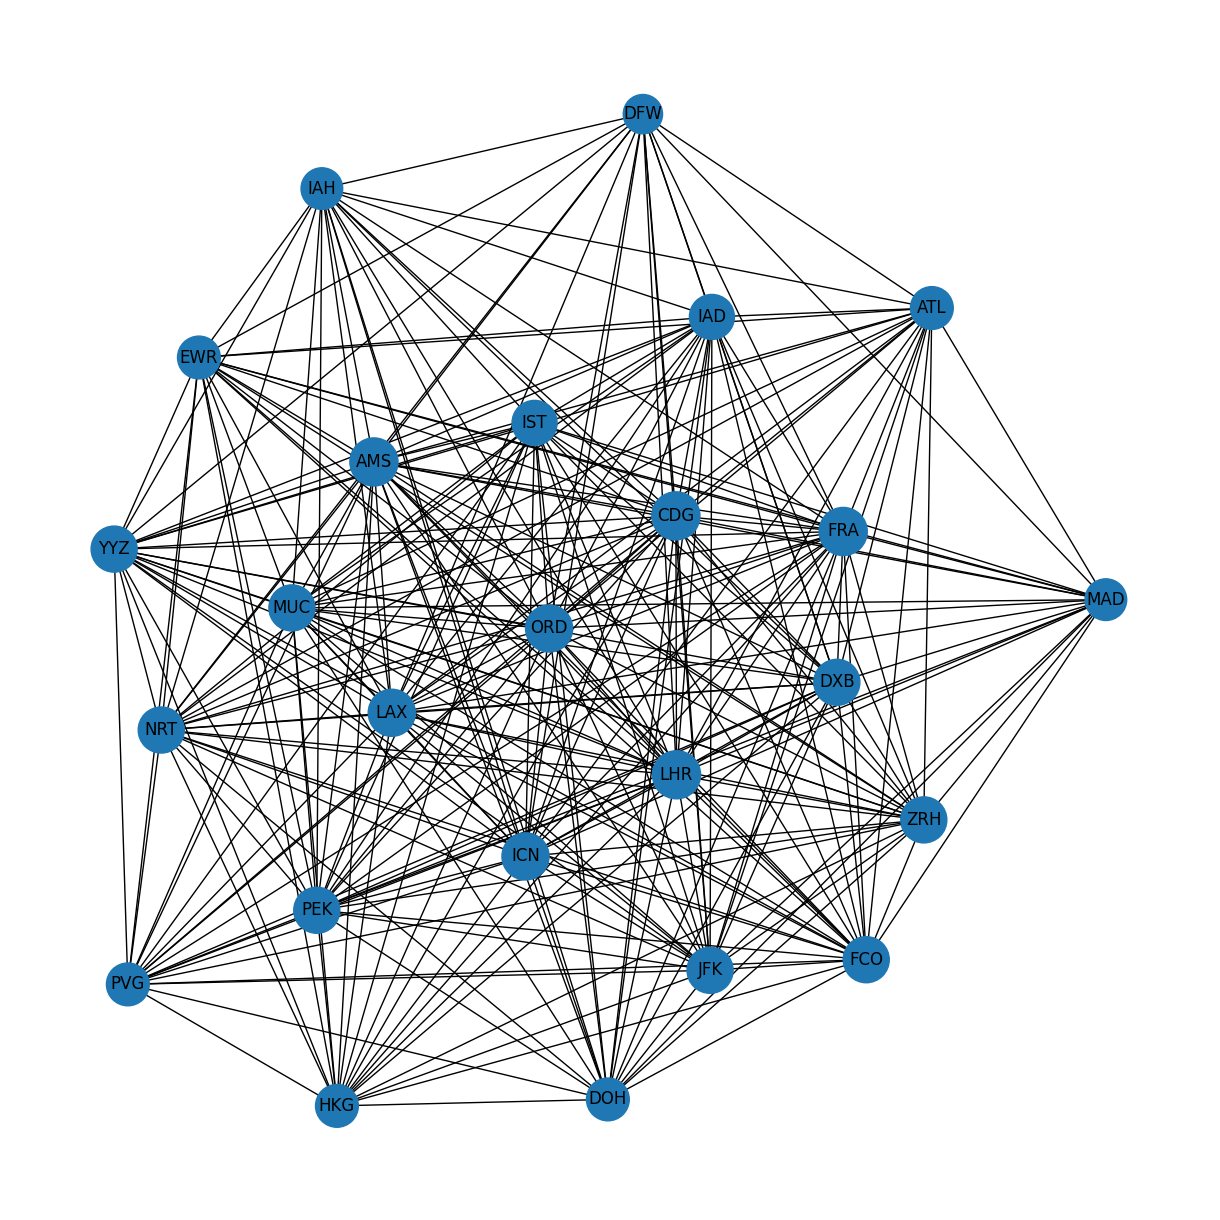

In [15]:
subgraph = G.subgraph(top_airports_closeness)
plt.figure(figsize=(12, 12))
node_sizes = [subgraph.degree(node) * 50 for node in subgraph.nodes()]
pos = nx.spring_layout(subgraph, k=0.2)
nx.draw(subgraph, pos, with_labels=True, node_size=node_sizes)
plt.show()

In [16]:
betweenness = nx.betweenness_centrality(G)
top_k = 10
for x in sorted(betweenness, key=betweenness.get, reverse=True)[:top_k]:
  print(x, betweenness[x])

ANC 0.07248270694418972
LAX 0.06520775890690773
CDG 0.06193588499442267
DXB 0.056487934217392066
FRA 0.05108570902564666
PEK 0.04956926032160239
AMS 0.04926244723364709
SEA 0.0481076330124328
ORD 0.047939815908457736
YYZ 0.04265081111920775


In [17]:
top_airports_betweenness = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)[:25]
top_airports_betweenness = [airport[0] for airport in top_airports_betweenness]
top_airports_betweenness

['ANC',
 'LAX',
 'CDG',
 'DXB',
 'FRA',
 'PEK',
 'AMS',
 'SEA',
 'ORD',
 'YYZ',
 'IST',
 'GRU',
 'LHR',
 'NRT',
 'SYD',
 'BNE',
 'SIN',
 'DME',
 'ATL',
 'DFW',
 'YUL',
 'HKG',
 'CPH',
 'ICN',
 'DEN']

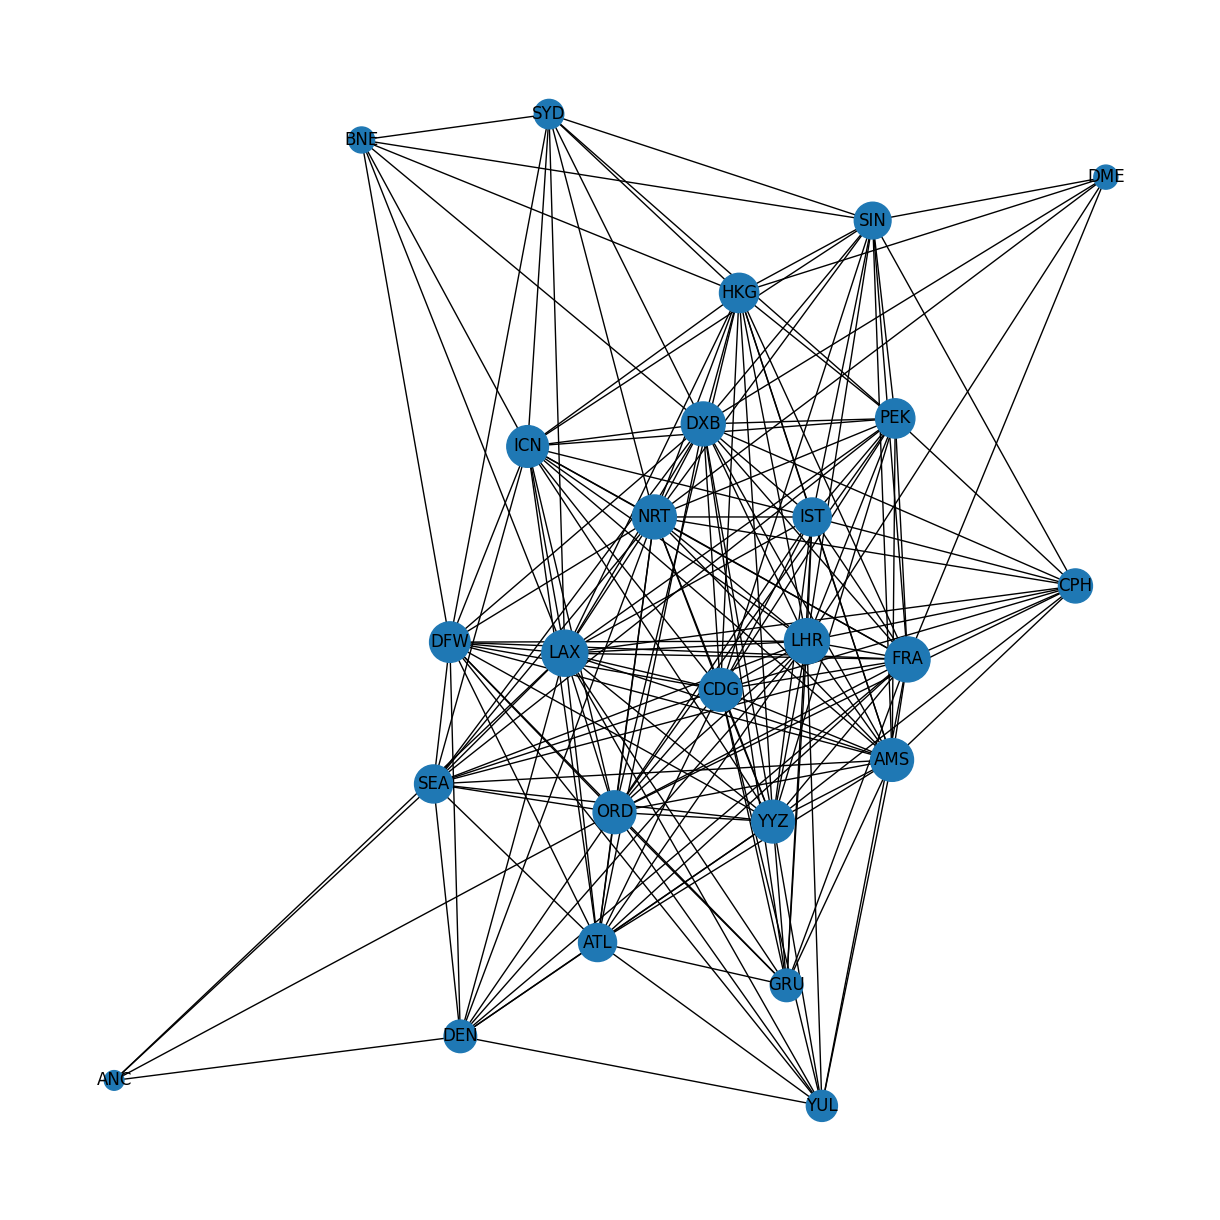

In [18]:
subgraph = G.subgraph(top_airports_betweenness)
plt.figure(figsize=(12, 12))
node_sizes = [subgraph.degree(node) * 50 for node in subgraph.nodes()]
pos = nx.spring_layout(subgraph, k=0.2)
nx.draw(subgraph, pos, with_labels=True, node_size=node_sizes)
plt.show()